In [2]:
#pip install datasets
#pip install numpy
#pip install pandas
#pip install seaborn
#pip install scikit-learn
#pip install openpyxl
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from datasets import load_dataset

In [3]:
dataset = load_dataset("alexcom/analisis-sentimientos-textos-turisitcos-mx-polaridad")

In [4]:
df_test = pd.DataFrame(dataset['test'])
df_train = pd.DataFrame(dataset['train'])

In [5]:
df_test

,text,label
0,"parece familiar?. probablemente no, ya que se ...",3
1,"el hotel, espectacular. el hotel es muy bonito...",5
2,lugar bueno escondido. amabilidad profesionali...,4
3,situacion privilegiada. hotel con una situacio...,5
4,caminata y visita al cerro monserrate. buen lu...,5
...,...,...
75505,"execelente!. el fin de semana pasado, llevé un...",5
75506,"oaxaca caprichos en santa lucía. quiero decir,...",4
75507,visita de familia. realmente disfrutamos visit...,5
75508,vista de la ciudad genial!!. excelente experie...,4


In [6]:
df_train

,text,label
0,el mejor lugar para comer sushi. excelente lug...,5
1,vista hermosa!. me sorprendió la maravillosa v...,5
2,"desastroso. buenas noches, ante todo explicar...",1
3,todo bien excepto que se niegan a dar vasos de...,3
4,el mejor zoologico de méxico. el ambiente es m...,5
...,...,...
176187,"gran hotel con buen servicio. hotel muy bueno,...",5
176188,estancia cómoda en la frontera de puebla y tla...,5
176189,encantador. realmente nos gustó quedarnos en e...,5
176190,en general la atención del personal fue excele...,5


In [7]:
#etiqueta y enumeracion
target_map = {1 : 'muy negativo', 2 : 'Negativo', 3 : 'Neutro', 4 : 'bueno', 5 : 'muy bueno'}
df_train['category'] = df_train['label'].map(target_map)

In [8]:
df_train

,text,label,category
0,el mejor lugar para comer sushi. excelente lug...,5,muy bueno
1,vista hermosa!. me sorprendió la maravillosa v...,5,muy bueno
2,"desastroso. buenas noches, ante todo explicar...",1,muy negativo
3,todo bien excepto que se niegan a dar vasos de...,3,Neutro
4,el mejor zoologico de méxico. el ambiente es m...,5,muy bueno
...,...,...,...
176187,"gran hotel con buen servicio. hotel muy bueno,...",5,muy bueno
176188,estancia cómoda en la frontera de puebla y tla...,5,muy bueno
176189,encantador. realmente nos gustó quedarnos en e...,5,muy bueno
176190,en general la atención del personal fue excele...,5,muy bueno


In [9]:
#etiqueta y enumeracion
target_map = {1 : 'muy negativo', 2 : 'Negativo', 3 : 'Neutro', 4 : 'bueno', 5 : 'muy bueno'}
df_test['category'] = df_test['label'].map(target_map)

In [10]:
df_test

,text,label,category
0,"parece familiar?. probablemente no, ya que se ...",3,Neutro
1,"el hotel, espectacular. el hotel es muy bonito...",5,muy bueno
2,lugar bueno escondido. amabilidad profesionali...,4,bueno
3,situacion privilegiada. hotel con una situacio...,5,muy bueno
4,caminata y visita al cerro monserrate. buen lu...,5,muy bueno
...,...,...,...
75505,"execelente!. el fin de semana pasado, llevé un...",5,muy bueno
75506,"oaxaca caprichos en santa lucía. quiero decir,...",4,bueno
75507,visita de familia. realmente disfrutamos visit...,5,muy bueno
75508,vista de la ciudad genial!!. excelente experie...,4,bueno


In [11]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_train

<176192x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 6691608 stored elements in Compressed Sparse Row format>

In [12]:
X_test = vectorizer.transform(df_test['text'])
X_test

<75510x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 2877745 stored elements in Compressed Sparse Row format>

In [13]:
Y_train = df_train['label']
Y_test = df_test['label']

In [14]:
#entranar modelo con regresion logistica
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.7164116418452597
Test acc: 0.7052046086611045


In [15]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [16]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[5.78024691e-01, 1.10370370e-01, 1.64938272e-01, 4.54320988e-02,
        1.01234568e-01],
       [1.46079040e-01, 2.49534451e-01, 3.71404924e-01, 1.18766812e-01,
        1.14214773e-01],
       [2.43103335e-02, 3.13871961e-02, 4.37127318e-01, 2.93231112e-01,
        2.13944040e-01],
       [2.13108543e-03, 1.70486835e-03, 5.68526236e-02, 3.53262929e-01,
        5.86048494e-01],
       [4.18882494e-04, 3.09608800e-04, 7.50346033e-03, 7.12373425e-02,
        9.20530706e-01]])

In [17]:
def plot_cm(cm):
    classes = ['muy negativo', 'negativo', 'neutro', 'bueno' , 'muy bueno']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("label")

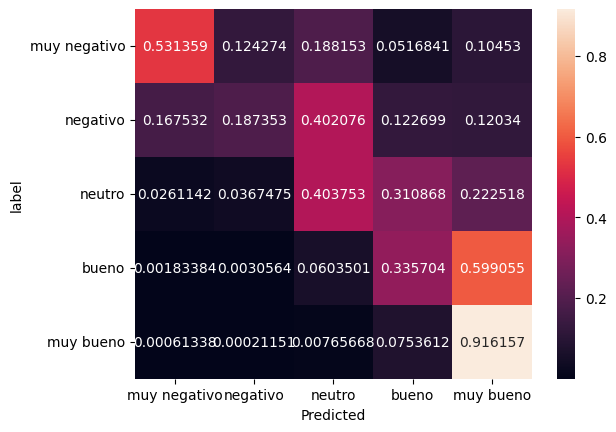

In [18]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

<Axes: >

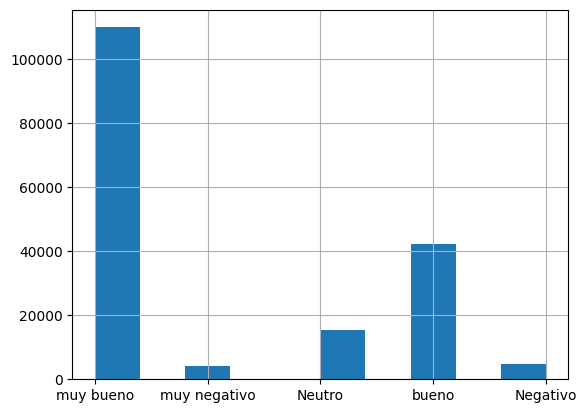

In [19]:
df_train['category'].hist()